In [9]:
#data ste name agricultural_yield


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [12]:
 x = df[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]
y = df ['Yield_kg_per_hectare']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(x_train)

# Transform the testing data
X_test = scaler.transform(x_test)


In [19]:

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()


C:\Users\NICE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34104.7305 - mae: 150.9019 - val_loss: 32661.1934 - val_mae: 143.9642
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33708.5938 - mae: 149.7889 - val_loss: 31901.0215 - val_mae: 143.0072
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31441.9023 - mae: 145.2968 - val_loss: 31718.1914 - val_mae: 144.0651
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31485.4453 - mae: 144.2163 - val_loss: 30007.4258 - val_mae: 138.2892
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32234.7695 - mae: 145.7558 - val_loss: 29402.4258 - val_mae: 136.7265
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30437.2637 - mae: 142.4324 - val_loss: 29263.7656 - val_mae: 138.4432
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31715.4824 - mae: 145.7415 - val_loss: 28321.8945 - val_mae: 134.9784
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30751.8262 - mae: 143.1232 - val_loss: 28007.7

In [22]:
# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test mae: {mae}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8624.5508 - mae: 74.8063 
Test Loss: 8258.271484375
Test mae: 73.19711303710938


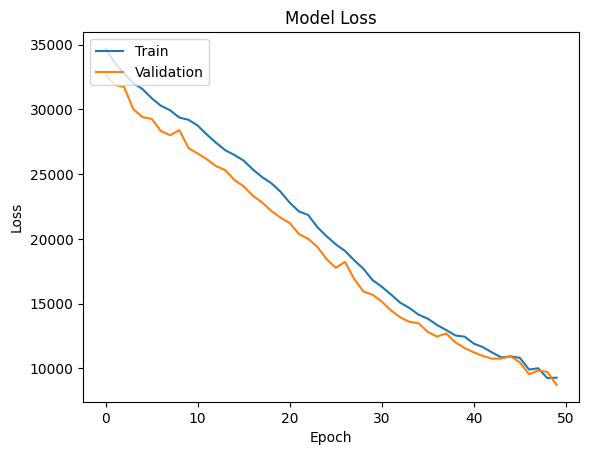

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


C:\Users\NICE\AppData\Local\Temp\ipykernel_1540\4211973164.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\NICE\AppData\Local\Temp\ipykernel_1540\4211973164.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


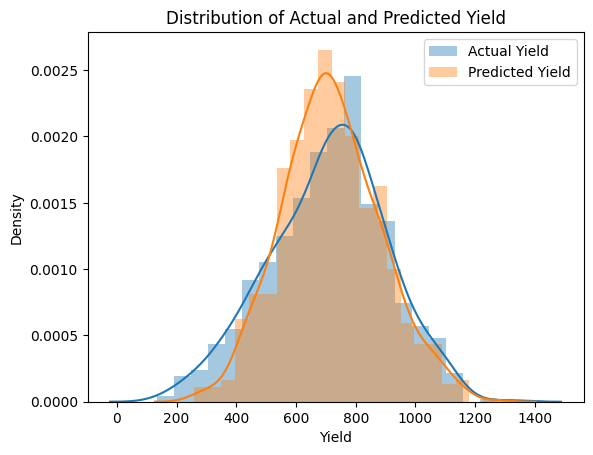

In [28]:
#Distribution plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 579.7551 ],
       [ 592.24365],
       [1063.9778 ],
       [ 628.74805],
       [ 764.30365],
       [ 973.0456 ],
       [ 422.54797],
       [ 717.5626 ],
       [ 567.8178 ],
       [ 775.3056 ],
       [ 534.9118 ],
       [ 641.6052 ],
       [ 581.4916 ],
       [ 703.16815],
       [ 825.73444],
       [ 635.4954 ],
       [ 921.0999 ],
       [ 597.25854],
       [ 726.00336],
       [ 477.62872],
       [ 775.75836],
       [ 764.0312 ],
       [ 480.99902],
       [ 764.6235 ],
       [ 986.1923 ],
       [ 738.7243 ],
       [ 622.5201 ],
       [ 946.679  ],
       [ 781.7625 ],
       [ 589.4534 ],
       [ 644.8454 ],
       [ 778.1917 ],
       [ 790.8464 ],
       [ 945.3768 ],
       [ 609.2972 ],
       [ 673.0513 ],
       [ 676.1043 ],
       [ 986.174  ],
       [ 287.77362],
       [ 607.28876],
       [ 902.39294],
       [ 863.57404],
       [ 767.3674 ],
       [ 932.8332 ],
       [ 535.9932 ],
       [ 806.4751 ],
       [ 773.3021 ],
       [ 495.